# Python Übung 1 - Daten untersuchen

In [1]:
data1 = [[10, 8.04], [8, 6.95], [13, 7.58], [9, 8.81], [11, 8.33], [14, 9.96], [6, 7.24], [4,  4.26], [12, 10.84], [7, 4.82], [5, 5.68]]
data2 = [[10, 9.14], [8, 8.14], [13, 8.74], [9, 8.77], [11, 9.26], [14, 8.1],  [6, 6.13], [4,  3.1],  [12,  9.13], [7, 7.26], [5, 4.74]]
data3 = [[10, 7.46], [8, 6.77], [13,12.74], [9, 7.11], [11, 7.81], [14, 8.84], [6, 6.08], [4,  5.39], [12,  8.15], [7, 6.42], [5, 5.73]]
data4 = [[ 8, 6.58], [8, 5.76], [ 8, 7.71], [8, 8.84], [ 8, 8.47], [ 8, 7.04], [8, 5.25], [19,12.5],  [ 8,  5.56], [8, 7.91], [8, 6.89]]

1: Benutzen Sie eine Python-Funktion, um die Anzahl der Dimensionen p zu berechnen für alle 4 Datenreihen. 
Hinweis: Importieren Sie pandas und erstellen Sie 4 DataFrames für die Daten, benennen Sie die Spalten X und Y.

In [2]:
import pandas as pd

# Create dataframes for all datasets
df1 = pd.DataFrame(data1, columns=["X","Y"])
df2 = pd.DataFrame(data2, columns=["X","Y"])
df3 = pd.DataFrame(data3, columns=["X","Y"])
df4 = pd.DataFrame(data4, columns=["X","Y"])

# to loop over dataframes
dataframes = [df1, df2, df3, df4]

for i, df in enumerate(dataframes):
    print(f"Dataset {i}:", len(df.columns), "dimensions")

Dataset 0: 2 dimensions
Dataset 1: 2 dimensions
Dataset 2: 2 dimensions
Dataset 3: 2 dimensions


2: Geben Sie die Anzahl der Datenpunkte, den Durchschnitt, Min, Max, und die Perzentilen aus. Vergleichen Sie die Werte über alle Datensätze.

In [11]:
print("{:2} {:<17} {:<4} {:<5} {:<18} {:<17}".format("N", "Mean", "Min", "Max", "0.25", "0.75"))
print("-"*68)

for df in dataframes:
    print("{:2} {:<17} {:<4} {:<5} {:<18} {:<17}".format(len(df), df.mean().Y, df.min().Y, df.max().Y, df.Y.quantile(0.25), df.Y.quantile(0.75)))

N  Mean              Min  Max   0.25               0.75             
--------------------------------------------------------------------
11 7.500909090909093 4.26 10.84 6.3149999999999995 8.57             
11 7.50090909090909  3.1  9.26  6.695              8.95             
11 7.5               5.39 12.74 6.25               7.98             
11 7.500909090909091 5.25 12.5  6.17               8.190000000000001


2.1: Eigenschaften ausgeben mit pandas DataFrames:

In [12]:
for df in dataframes:
    print("---------------------------")
    print(df.describe())

---------------------------
               X          Y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.031568
min     4.000000   4.260000
25%     6.500000   6.315000
50%     9.000000   7.580000
75%    11.500000   8.570000
max    14.000000  10.840000
---------------------------
               X          Y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.031657
min     4.000000   3.100000
25%     6.500000   6.695000
50%     9.000000   8.140000
75%    11.500000   8.950000
max    14.000000   9.260000
---------------------------
               X          Y
count  11.000000  11.000000
mean    9.000000   7.500000
std     3.316625   2.030424
min     4.000000   5.390000
25%     6.500000   6.250000
50%     9.000000   7.110000
75%    11.500000   7.980000
max    14.000000  12.740000
---------------------------
               X          Y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.030579
min     8.000000   5

3: Berechnen Sie die Korrelation zwischen X und Y für alle 4 Datensätze. Was können Sie daraus schließen? Berechnen Sie zudem auch die Korrelation ^2. 

In [4]:
print("{:<19} {:<19}".format("Correlation", "Correlation^2"))
print("-"*40)

for df in dataframes:
    print("{:<19} {:<19}".format(df.corr()["X"]["Y"], df.corr()["X"]["Y"]**2))

Correlation         Correlation^2      
----------------------------------------
0.8164205163448399  0.666542459508775  
0.8162365060002427  0.6662420337274841 
0.8162867394895984  0.6663240410665595 
0.8165214368885028  0.6667072568984652 


4: Erstellen Sie Scatterplots für alle vier Datensätze. Hint: Nutzen Sie Seaborn oder Matplotlib. 

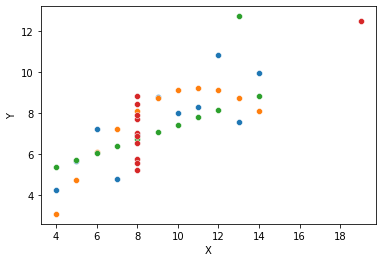

In [5]:
import seaborn as sns 

for i, df in enumerate(dataframes):
    sns.scatterplot(x=df["X"], y=df["Y"])

5: Führen Sie eine lineare Regression durch. Der unten gegebene Code importiert bereits numpy und das Modell als auch den Plot. Das reshaping für die Lineare Regression ist auch schon erledigt. 

In [6]:
import numpy as np
import matplotlib.pyplot as plt  
from sklearn.linear_model import LinearRegression

dataframes_lr = []

# reshape every dataset
for df in dataframes:
    X = df.iloc[:, 0].values.reshape(-1, 1)  # numpy! 
    Y = df.iloc[:, 1].values.reshape(-1, 1)  
    
    dataframes_lr.append([X,Y])

5: contd. Danach müssen Sie das Objekt LinearRegression instanziieren und "fitten". Sie können die Regression mit score bewerten. Geben Sie die Koeffizienten aus (coef_) und die Schnittstelle (intercept_). Vergleichen Sie den score (R^2-Wert) mit dem oben berechneten Korrelation ^ 2 Wert. 

In [7]:
lrs = []

for df in dataframes_lr:
    X = df[0]
    Y = df[1]
    
    regr = LinearRegression()
    regr.fit(X, Y)
    
    print("Score: {}  Coef: {:14}  Intercept: {}".format(regr.score(X, Y), str(regr.coef_), regr.intercept_))
    
    lrs.append(regr)

Score: 0.6665424595087748  Coef: [[0.50009091]]  Intercept: [3.00009091]
Score: 0.6662420337274844  Coef: [[0.5]]         Intercept: [3.00090909]
Score: 0.6663240410665592  Coef: [[0.49972727]]  Intercept: [3.00245455]
Score: 0.6667072568984653  Coef: [[0.49990909]]  Intercept: [3.00172727]


6: Sagen die die Werte für Y_pred mit predict voraus. Nutzen Sie einen Scatterplot, um X, Y und die Regressionslinie einzuzeichnen. Das geht z. B. mit Matplotlib oder Seaborn. 

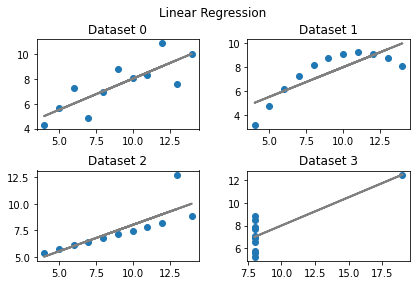

In [8]:
fig, axs = plt.subplots(2, 2)
fig.suptitle("Linear Regression")
fig.tight_layout(h_pad=2)

for i, df in enumerate(dataframes_lr):
    X = df[0]
    Y = df[1]
    
    axs[int(i/2), i%2].scatter(X, Y)
    axs[int(i/2), i%2].plot(X, lrs[i].predict(X), color='grey', linewidth=2)
    axs[int(i/2), i%2].set_title(f"Dataset {i}")

7: Löschen Sie den "Ausreißer" aus Datensatz 3. Wiederholen Sie die Schritte 5 und 6. Was fällt auf? 

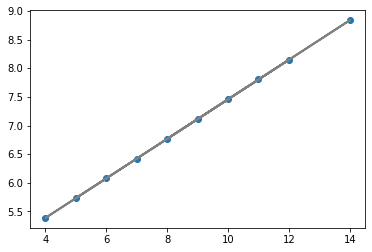

In [9]:
# manually removed outliers from dataset 3
data3_cleaned = [[10, 7.46], [8, 6.77], [9, 7.11], [11, 7.81], [14, 8.84], [6, 6.08], [4,  5.39], [12,  8.15], [7, 6.42], [5,5.73]]

# new linear regression model
df3_cleaned = pd.DataFrame(data3_cleaned, columns=["X","Y"])
X = df3_cleaned.iloc[:, 0].values.reshape(-1, 1)  # numpy! 
Y = df3_cleaned.iloc[:, 1].values.reshape(-1, 1)  
regr = LinearRegression()
regr.fit(X, Y)

# draw plot
plt.scatter(X, Y)
plt.plot(X, regr.predict(X), color='grey', linewidth=2)
plt.show()

8: Denken Sie kurz darüber nach, was Sie aus dieser gesamten Übung mitnehmen können. Helfen Sie Mitstudierenden.

9: Optional: Erstellen Sie Boxplots für die Daten.

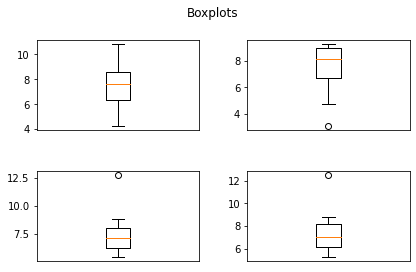

In [10]:
fig, axs = plt.subplots(2, 2)
fig.suptitle("Boxplots")
fig.tight_layout(h_pad=2)

for i, df in enumerate(dataframes):
    axs[int(i/2), i%2].boxplot(df.Y)
    axs[int(i/2), i%2].get_xaxis().set_visible(False)